# Assignment Kfold

In [ ]:
# importing the basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the dataset to python environment

In [2]:
data=pd.read_csv('C:/Users/hp/Downloads/titanic_dataset (2).csv')

In [ ]:
# EDA

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

In [ ]:
# checking for missing(null) values

In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# checking the no of rows and columns of the data

In [5]:
data.shape

(891, 12)

In [ ]:
# types of data

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# most of cabin data is missing (like 70%) so dropping it

In [7]:
data.drop('Cabin',axis=1,inplace=True) 

In [ ]:
# fill the age column with median

In [8]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [ ]:
# filling Embarked column with mode (object column with two missing values)

In [9]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [52]:
# missing values are filled

In [ ]:
# checking for unique values

In [11]:
data['Name'].nunique()

891

In [12]:
data['Ticket'].nunique()

681

In [13]:
data['Fare'].nunique()

248

In [ ]:
# name and ticket has nothing to do with the survival(taget) so dropping it

In [14]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [18]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [19]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# splitting data

In [20]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm = SVC(kernel='linear')
svm=svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
confusion_matrix(y_test,y_pred_svm)

array([[88, 17],
       [23, 51]], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred_svm)

0.776536312849162

## kNN

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier

In [28]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

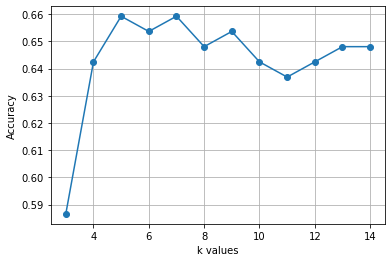

In [29]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [30]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_kNN=classifier.predict(X_test)

In [31]:
confusion_matrix(y_test,y_pred_kNN)

array([[88, 17],
       [44, 30]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred_kNN)

0.659217877094972

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# hold out technique

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LRmodel = LogisticRegression()

In [36]:
LRmodel= LRmodel.fit(X_train,y_train)

In [37]:
score_LR=LRmodel.score(X_test,y_test)

In [38]:
score_LR

0.770949720670391

## k fold cross validation

In [39]:
from sklearn.model_selection import KFold

In [40]:
kfold_validator=KFold(10)

In [41]:
for train_index,test_index in kfold_validator.split(X,y):
    print('training index',train_index)
print('test index',test_index)

training index [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cv_result = cross_val_score(LRmodel,X,y,cv=kfold_validator)

In [44]:
cv_result

array([0.75555556, 0.82022472, 0.76404494, 0.84269663, 0.71910112,
       0.7752809 , 0.74157303, 0.76404494, 0.85393258, 0.82022472])

In [45]:
np.mean(cv_result)

0.7856679151061174

## Stratified kfold cross validation

In [46]:
from sklearn.model_selection import StratifiedKFold

In [47]:
skfold_validator= StratifiedKFold(n_splits=10)

In [48]:
for train_index,test_index in skfold_validator.split(X,y):
    print('training index',train_index)
print('test index',test_index)

training index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [49]:
skcv_result=cross_val_score(LRmodel,X,y,cv=skfold_validator)

In [50]:
skcv_result

array([0.73333333, 0.80898876, 0.75280899, 0.83146067, 0.76404494,
       0.75280899, 0.78651685, 0.75280899, 0.82022472, 0.7752809 ])

In [51]:
np.mean(skcv_result)

0.7778277153558053